## Q1: How many convolutional layers are in the ResNet-18 model ?

Ans - 20

## Q2: What is the input dimension of the last linear layer ?

Ans - 512

## Q3: How many trainable parameters and how many gradients in the ResNet-18 model that you build when using SGD

In [1]:
from resnet_test import *
import torch
from torch.optim import SGD,  Adam
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def get_params(lis):
    return sum(p.numel() for p in lis if p.requires_grad)

def get_gradients(lis):
    return sum(p.grad.numel() for p in lis if p.requires_grad)

To get the number of  gradients, backprop needs to be done atleast once

In [2]:
net = ResNet18()

inp = torch.ones(64, 3, 32, 32)
labels = torch.ones(64).long()

opt = SGD(net.parameters(), lr = 0.01)

out = net(inp)
loss = F.cross_entropy(out, labels)

opt.zero_grad()
loss.backward()
opt.step()
print('Number of trainable parameters are',get_params(opt.param_groups[0]['params']))
print('Number of gradients are',get_gradients(opt.param_groups[0]['params']))

Number of trainable parameters are 11173962
Number of gradients are 11173962


## Q4: Same question as Q3, except now using Adam

In [3]:
net = ResNet18()

inp = torch.ones(64, 3, 32, 32)
labels = torch.ones(64).long()

opt = Adam(net.parameters(), lr = 0.01)

out = net(inp)
loss = F.cross_entropy(out, labels)

opt.zero_grad()
loss.backward()
opt.step()
print('Number of trainable parameters are',get_params(opt.param_groups[0]['params']))
print('Number of gradients are',get_gradients(opt.param_groups[0]['params']))

Number of trainable parameters are 11173962
Number of gradients are 11173962


## C3  I/O optimization starting from code in C2
Report the total time spent waiting for the Dataloader varying the number of workers starting from zero and increment the number of workers by 4

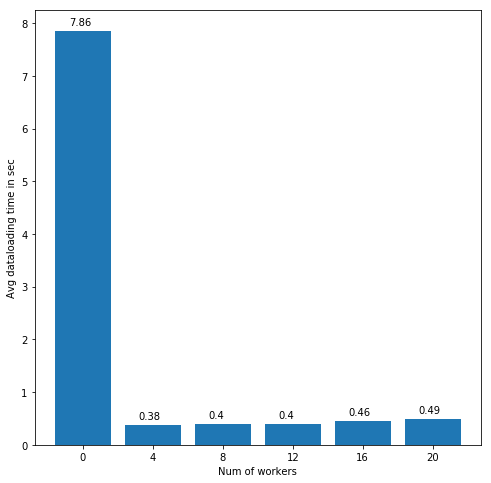

In [4]:
workers = [0,4,8,12,16,20]
dataloading_time = [7.86, 0.38, 0.4,0.4, 0.46, 0.49 ]

y_pos = np.arange(len(workers))

plt.figure(figsize = (8,8))
plt.bar(y_pos, dataloading_time, align = 'center')
plt.xticks(y_pos, workers)
plt.xlabel('Num of workers')
plt.ylabel('Avg dataloading time in sec')
 
for i in range(len(workers)):
    plt.text(x = y_pos[i] - 0.2 , y = dataloading_time[i]+0.1, s = str(dataloading_time[i]), size = 10)
plt.show()


4 workers are needed for the best performance

## C4
Visualize the data-loading time, computing time for these two runs and explain (in few words) the
differences

In [5]:
data_loading = [0.36, 0.38]
epoch_time = [29.87, 30.3]

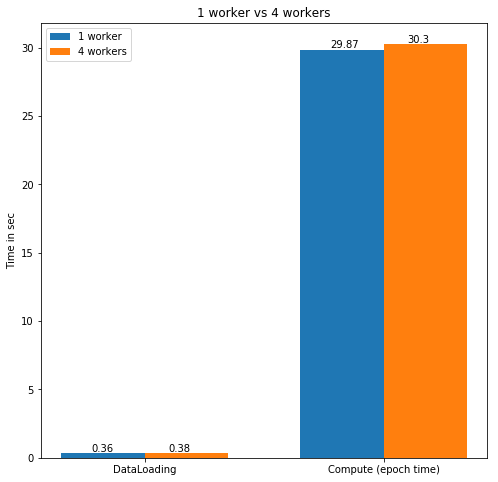

In [6]:
w1 = [0.36, 29.87]
w4 = [0.38,30.3]

ind = np.arange(2) 
width = 0.35   
plt.figure(figsize = (8,8))
plt.bar(ind, w1, width, label='1 worker')
plt.bar(ind + width, w4, width,
    label='4 workers')

plt.ylabel('Time in sec')
plt.title('1 worker vs 4 workers')

for i in range(len(w1)):
    plt.text(x = ind[i] - 0.05 , y = w1[i]+0.1, s = str(w1[i]), size = 10)
    plt.text(x = ind[i] + width / 2 + 0.1 , y = w4[i]+0.1, s = str(w4[i]), size = 10)

plt.xticks(ind + width / 2, ('DataLoading', 'Compute (epoch time)'))
plt.legend(loc='best')
plt.show()

Both dataloading time and compute time are almost the same for workers = 1 and workers = 4. Since the dataset size is very small, the entire dataset is loaded and stored in RAM. Therefore as soon as num workers is increased from 0 to 1, there is a huge drop in dataloading time

When number of workers is increased from 1 to 4, there is an overhead due to IO usage and memory usage due to which dataloading time and compute time increase slightly. Setting too many workers could cause seriously high IO usage which can become very ineffective.

## C5: Training in GPUs and optimizer starting from the code in C3

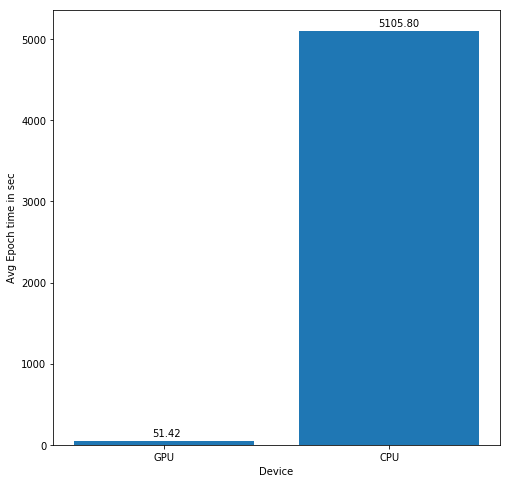

In [7]:
gpu_epoch_times = [49.8, 50.4, 52.1,52.4,52.4]
cpu_epoch_times = [5094, 5114, 5110, 5103, 5108]

avg_times = [np.mean(gpu_epoch_times), np.mean(cpu_epoch_times)]

y_pos = np.arange(2)

plt.figure(figsize = (8,8))
plt.bar(y_pos, avg_times, align = 'center')
plt.xticks(y_pos, ['GPU', 'CPU'])
plt.ylabel('Avg Epoch time in sec')
plt.xlabel('Device')
for i in range(2):
    plt.text(x = y_pos[i] - 0.05 , y = avg_times[i]+50, s = "{0:.2f}".format(avg_times[i]) , size = 10)
plt.show()


## C6: Experimenting with different optimizers

In [8]:
epoch_time = {'sgd':[29.9, 29.8, 29.7,29.8,29.9],
             'nesterov':[29.9,29.9,29.8, 29.8, 29.7],
             'adagrad':[30.2, 30, 30.1, 30, 30.1],
             'adadelta':[30.5, 30.4, 30.5, 30.5, 30.5],
             'adam':[30.4, 30.3, 30.4, 30.4, 30.4]}

epoch_time = {k:np.mean(v) for k,v in epoch_time.items()}

loss_training = {'sgd':0.976, 'nesterov':0.821, 'adagrad': 0.689, 'adadelta': 0.674, 'adam':0.637}
precision_test = {'sgd':66.01, 'nesterov':67.04, 'adagrad': 70.01, 'adadelta': 73.60, 'adam':74.08}


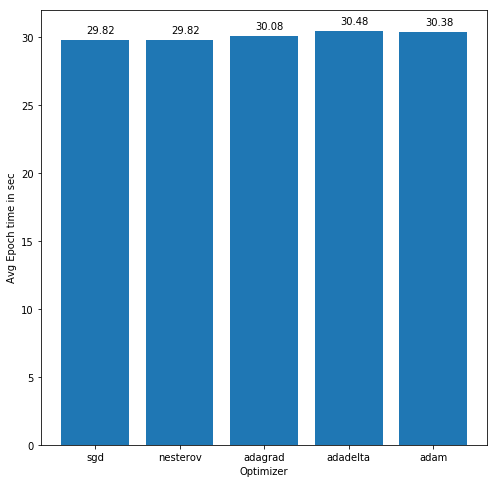

In [9]:
y_pos = np.arange(5)

k,v = list(epoch_time.keys()), list(epoch_time.values())
plt.figure(figsize = (8,8))
plt.bar(y_pos, v, align = 'center')
plt.xticks(y_pos, k)
plt.xlabel('Optimizer')
plt.ylabel('Avg Epoch time in sec')
 
for i in range(len(y_pos)):
    plt.text(x = y_pos[i] - 0.1 , y = v[i]+0.5, s = "{0:.2f}".format(v[i]) , size = 10)
plt.show()

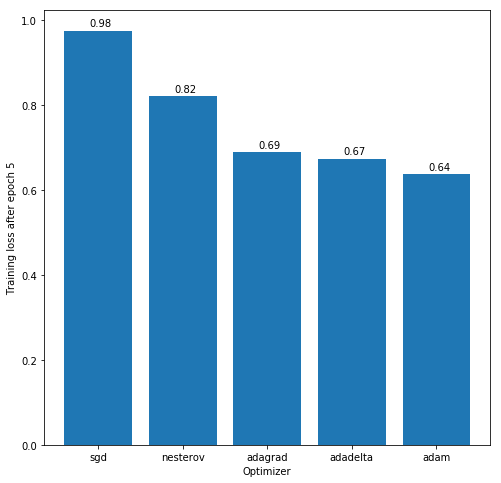

In [10]:
y_pos = np.arange(5)

k,v = list(loss_training.keys()), list(loss_training.values())
plt.figure(figsize = (8,8))
plt.bar(y_pos, v, align = 'center')
plt.xticks(y_pos, k)
plt.xlabel('Optimizer')
plt.ylabel('Training loss after epoch 5')
 
for i in range(len(y_pos)):
    plt.text(x = y_pos[i] - 0.1 , y = v[i]+0.01, s = "{0:.2f}".format(v[i]) , size = 10)
plt.show()

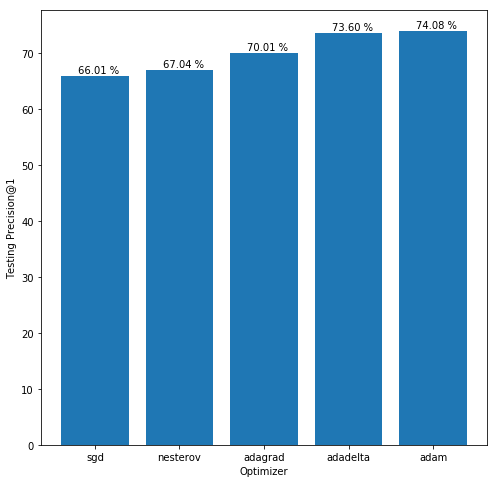

In [11]:
y_pos = np.arange(5)

k,v = list(precision_test.keys()), list(precision_test.values())
plt.figure(figsize = (8,8))
plt.bar(y_pos, v, align = 'center')
plt.xticks(y_pos, k)
plt.xlabel('Optimizer')
plt.ylabel('Testing Precision@1')
 
for i in range(len(y_pos)):
    plt.text(x = y_pos[i] - 0.2 , y = v[i]+0.5, s = "{0:.2f} %".format(v[i]) , size = 10)
plt.show()

## C7: Experimenting without Batch Norm layer

In [12]:
training_loss = {'with BN':[2.11, 1.55, 1.32, 1.09,0.91],
                'without BN':[1.93, 1.53, 1.32, 1.12, 0.98]}
precision = {'with BN':[38.79, 44.64, 52.49, 62.93, 70.37],
            'without BN':[39.22, 49.14, 58.42, 63.25, 71.08]}

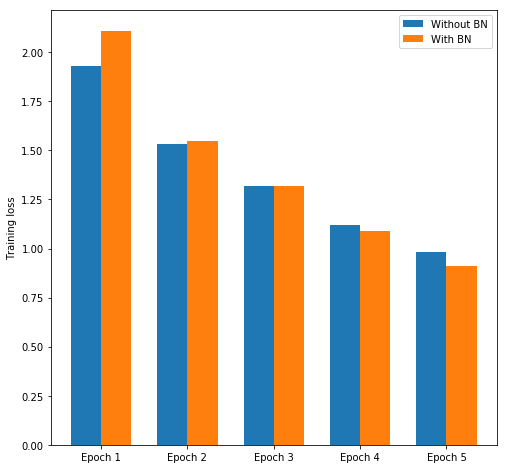

In [13]:

ind = np.arange(5) 
width = 0.35   
plt.figure(figsize = (8,8))
plt.bar(ind, training_loss['without BN'], width, label='Without BN')
plt.bar(ind + width, training_loss['with BN'], width,
    label='With BN')

plt.ylabel('Training loss')

plt.xticks(ind + width / 2, [f'Epoch {i}' for i in range(1,6)])
plt.legend(loc='best')
plt.show()

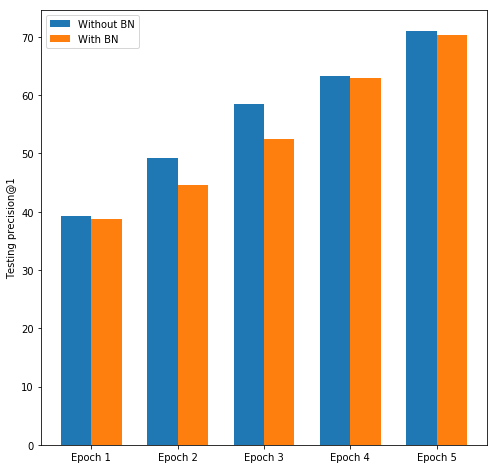

In [14]:

ind = np.arange(5) 
width = 0.35   
plt.figure(figsize = (8,8))
plt.bar(ind, precision['without BN'], width, label='Without BN')
plt.bar(ind + width, precision['with BN'], width,
    label='With BN')

plt.ylabel('Testing precision@1')

plt.xticks(ind + width / 2, [f'Epoch {i}' for i in range(1,6)])
plt.legend(loc='best')
plt.show()